In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Model
from keras.layers import Input, SeparableConv2D, concatenate
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
features_idx = train_features[1000,::]
print(features_idx.shape)
img_num = np.random.randint(features_idx.shape[0])
print('img_num ',img_num)
im = features_idx[img_num]
print(im.shape)

(32, 32, 3)
img_num  27
(32, 3)


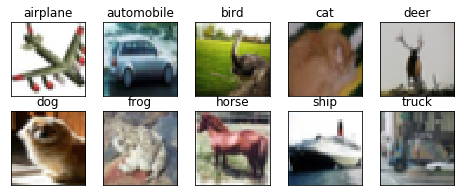

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/EVA/assgn6_cifar10-base-model.h5")

## NEW model with some changes 

* remove dense , add layers required to reach RF*
* fix kernel scaleup and down (1x1),see if all dropouts are properly placed*
* Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same'," *

In [58]:
model = Sequential()

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 32x32 x48
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(48, 3, 3)) # 30x30 x48
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) #15 x15 x48


model.add(Convolution2D(96, 3, 3, border_mode='same')) #15x15 x96
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
          
model.add(Convolution2D(96, 3, 3)) # 13x13 x96
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96

model.add(Convolution2D(192, 3, 3, border_mode='same')) #6x6x192
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(192, 3, 3)) #4x4x192
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, 1, border_mode='same'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarnin

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_105 (Bat (None, 32, 32, 48)        192       
_________________________________________________________________
activation_136 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_137 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 48)        0         
__________

In [82]:
input = Input(shape=(32,32,3))

# Normal Convolution
l1 = Convolution2D(48, 3, 3, border_mode='same') (input)                          # Output size : 32,32,32     RF : 3,3
l2 = Activation('relu')(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.1)(l3)

# Spatially Separable Conv
x = Convolution2D(48,3,1) (l4)
x = Activation('relu')(x)

x = Convolution2D(128,1,3)(x) # number of channels  can increase/remain same also
x = Activation('relu')(x)


# Transition block
x = MaxPooling2D(pool_size=(2, 2))(x)# Output size : 15,15,48    F : R18,18

# Spatially Separable Conv
x = Convolution2D(96,3,1, border_mode='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Convolution2D(160,1,3, border_mode='same')(x) # number of channels  can increase/remain same also
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

# Depthwise separable Conv
x = SeparableConv2D(96, 3,3)(x)
x = Activation('relu')(x)

                         
# Transition block
x = MaxPooling2D(pool_size=(2, 2))(x) #6x6x96


# Grouped convultion with dilaton 1
g1 = Convolution2D(192, 3, 3, border_mode='same')(x) #6x6x192
g1 = Activation('relu')(g1)
g1 = BatchNormalization()(g1)


g2 = Convolution2D(192, 5, 5, border_mode='same')(x) # 6X6x192
g2 = Activation('relu')(g2)
g2 = BatchNormalization()(g2)


gall_1 = concatenate([g1,g2]) #6x6x384
x = Convolution2D(192,1,1)(gall_1)     #6x6x192
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.15)(x)

# Grouped convultion with dilation 2                  
g3 = Convolution2D(192, 3, 3, border_mode='same',dilation_rate=1)(x)  #4x4x192
g3 = Activation('relu')(g3)
g3 = BatchNormalization()(g3)

g4 = Convolution2D(192, 3,3, border_mode='same',dilation_rate=2)(x) #4x4x192
g4 = Activation('relu')(g4)
g4 = BatchNormalization()(g4)

gall_2 = concatenate([g3,g4])  #6x6x384
x = Convolution2D(192,1,1)(gall_2)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.15)(x)

x = Convolution2D(10, 6, 6)(x)                                                     # Output size : 1,1,10     

x = Flatten()(x)                                                                   # Output size : 10
x = Activation('softmax')(x)


model = Model(inputs=input, outputs=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(160, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `SeparableConv2D` call t

In [83]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_274 (Conv2D)             (None, 32, 32, 48)   1344        input_34[0][0]                   
__________________________________________________________________________________________________
activation_294 (Activation)     (None, 32, 32, 48)   0           conv2d_274[0][0]                 
__________________________________________________________________________________________________
batch_normalization_218 (BatchN (None, 32, 32, 48)   192         activation_294[0][0]             
__________________________________________________________________________________________________
dropout_15

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=6, 
                                            verbose=1, 
                                            factor=0.95, 
                                            min_lr=0.0001)

# compile function of model class configures the network for training. 
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
  3/781 [..............................] - ETA: 42s - loss: 0.4329 - acc: 0.8438

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=50)`
  if sys.path[0] == '':


781/781 [==============================] - 30s 38ms/step - loss: 1.1502 - acc: 0.6844 - val_loss: 1.3646 - val_acc: 0.5635
Epoch 2/50
781/781 [==============================] - 30s 38ms/step - loss: 1.0911 - acc: 0.6993 - val_loss: 1.5337 - val_acc: 0.5307
Epoch 3/50
781/781 [==============================] - 30s 38ms/step - loss: 1.1806 - acc: 0.6656 - val_loss: 1.2403 - val_acc: 0.6228
Epoch 4/50
781/781 [==============================] - 30s 38ms/step - loss: 0.9978 - acc: 0.7085 - val_loss: 0.8744 - val_acc: 0.7144
Epoch 5/50
781/781 [==============================] - 30s 38ms/step - loss: 0.7735 - acc: 0.7352 - val_loss: 0.8552 - val_acc: 0.7345
Epoch 6/50
781/781 [==============================] - 30s 38ms/step - loss: 0.5561 - acc: 0.8052 - val_loss: 0.7616 - val_acc: 0.7605
Epoch 7/50
781/781 [==============================] - 30s 38ms/step - loss: 0.4771 - acc: 0.8325 - val_loss: 0.8211 - val_acc: 0.7592
Epoch 8/50
781/781 [==============================] - 30s 38ms/step - los

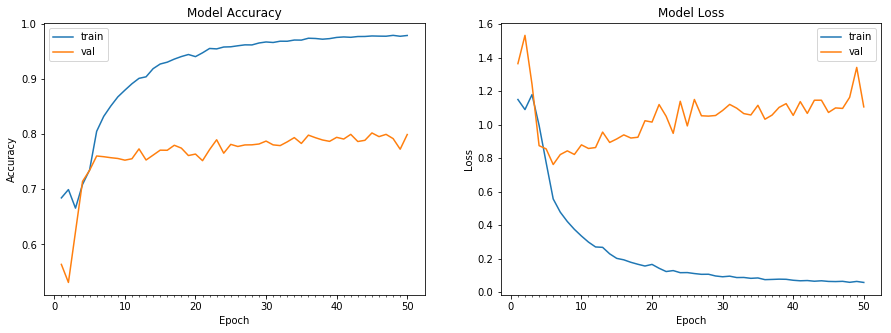

Accuracy on test data is: 79.95


In [88]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [89]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/EVA/functionalAPI_Assgn6b_cifar10-model.h5")

In [0]:
#load model 


from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/EVA/assgn6_cifar10-model.h5")